In [2]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

from scripts.ddqn_agent import DDQNAgent
from scripts.reinforce_agent import ReinforceMCwithoutBaselineAgent, ReinforceMCwithBaselineAgent
from scripts.training import Trainer, trainingInspector, test_agent, plot_test_results, compute_decay

## Hyperparameters

In [3]:
def episode_trigger(x):
    if x % 200 == 0:
        return True
    return False

def process_hyperparameters_ddqn(hyperparameters):
    hyperparameters.update({
        "eps_decay": compute_decay(
            hyperparameters["eps_start"],
            hyperparameters["eps_end"],
            hyperparameters["frac_episodes_to_decay"],
            hyperparameters["num_episodes"],
            hyperparameters["decay_type"]
        )
    })

    hyperparameters.pop("frac_episodes_to_decay", None)
    return hyperparameters
    
    

In [4]:
# Top 3 hyperparameter configurations
ddqn_type1_hyperparameter_list = [

    process_hyperparameters_ddqn(_) for _ in  [
    # Best performing hyperparameters
    {
        "num_episodes": 1000,
        "max_return": 500,
        "BUFFER_SIZE": int(5e6),
        "BATCH_SIZE": 1024,
        "UPDATE_EVERY": 40,
        "LR": 1e-3,
        "eps_start": 1,
        "eps_end": 0.005,
        "decay_type": "exponential",
        "frac_episodes_to_decay": 0.3
    }

]]

ddqn_type2_hyperparameter_list = [

    process_hyperparameters_ddqn(_) for _ in  [
    # Best performing hyperparameters
    {
        "num_episodes": 1000,
        "max_return": 500,
        "BUFFER_SIZE": int(5e6),
        "BATCH_SIZE": 1024,
        "UPDATE_EVERY": 40,
        "LR": 1e-4,
        "eps_start": 1,
        "eps_end": 0.005,
        "decay_type": "exponential",
        "frac_episodes_to_decay": 0.5
    }

]]

## Running Experiments DDQN

In [ ]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="backups/cartpole-ddqn-type1-visualizations",
    name_prefix="eval",
    episode_trigger=episode_trigger
)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
ddqn_type1_agent = DDQNAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    network_type=1,
    device = device,
    seed=0
)
trainer = Trainer()
ddqn_type1_results = test_agent(env, ddqn_type1_agent, trainer, ddqn_type1_hyperparameter_list, num_experiments=5)
env.close()

with open("backups/cartpole-plots/cartpole_ddqn_type1_results.pickle", 'wb') as handle:
    pickle.dump(ddqn_type1_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="backups/cartpole-ddqn-type2-visualizations",
    name_prefix="eval",
    episode_trigger=episode_trigger
)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
ddqn_type2_agent = DDQNAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    network_type=2,
    device = device,
    seed=0
)
trainer = Trainer()
ddqn_type2_results = test_agent(env, ddqn_type2_agent, trainer, ddqn_type2_hyperparameter_list, num_experiments=5)
env.close()

with open("backups/cartpole-plots/cartpole_ddqn_type2_results.pickle", 'wb') as handle:
    pickle.dump(ddqn_type2_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

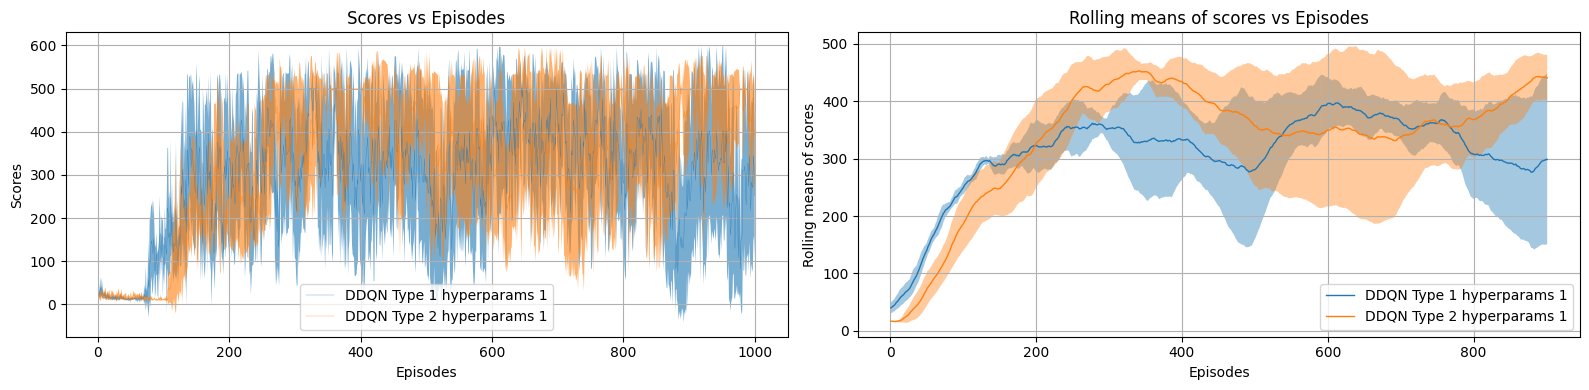

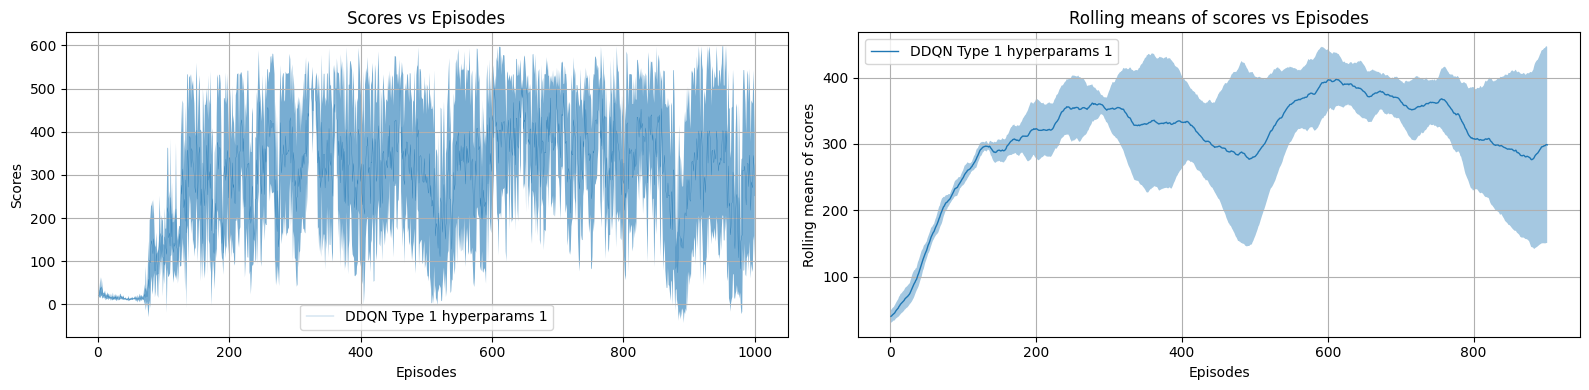

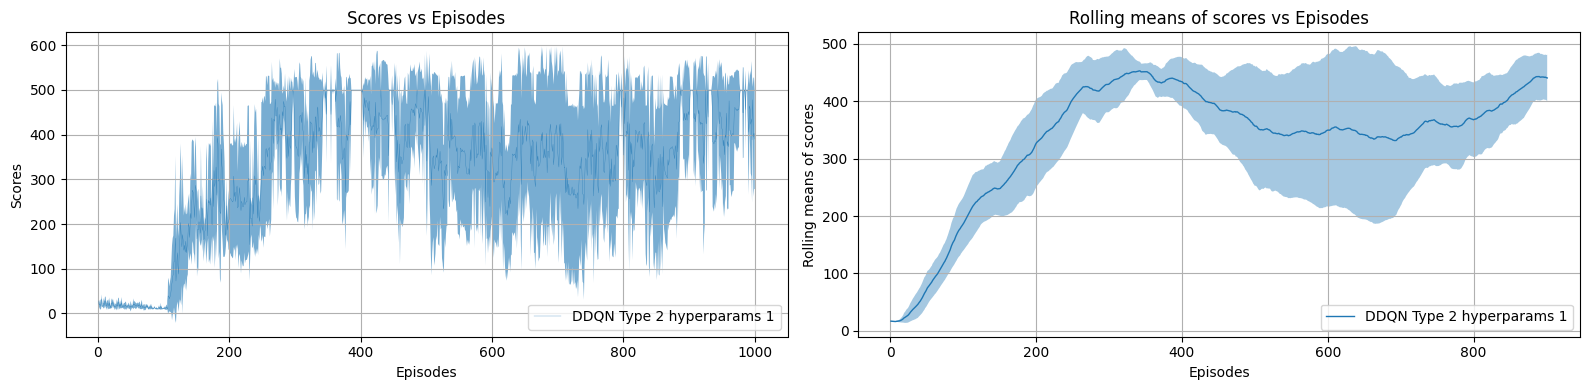

In [5]:
combined_results = ddqn_type1_results + ddqn_type2_results

plot_test_results(combined_results, [0, 1])
plt.savefig("backups/cartpole-plots/cartpole_ddqn_combined.png")
plot_test_results(ddqn_type1_results, [0])
plt.savefig("backups/cartpole-plots/cartpole_ddqn_type1.png")
plot_test_results(ddqn_type2_results, [0])
plt.savefig("backups/cartpole-plots/cartpole_ddqn_type2.png")